# Visualization of the Screw Axis of a 2D Motion
This notebook calculates and visualizes the screw axis corresponding to any 2D motion defined by a 2D rotation and a 2D translation.

In [141]:
from typing import Any, List, Tuple
from matplotlib import patches, pyplot as plt
import numpy as np


def visualize_construction(
    ellipses: List[Tuple[Any, Any]], 
    lines: List[Tuple[np.ndarray, Any]],
    arrows: List[Tuple[np.ndarray, Any]],
    points: List[Tuple[np.ndarray, Any]],
    title: str = ''
) -> None:
    fig, ax = plt.subplots()
    
    # Plot each ellipse
    for ellipse, kwargs in ellipses:
        e = patches.Ellipse(xy=ellipse.center, width=2*ellipse.a, height=2*ellipse.b, angle=np.degrees(ellipse.theta),
                            **kwargs)
        ax.add_patch(e)
    
    # Plot each line using axline with xy1 + slope
    for line, kwargs in lines:
        a, b, c = line
        if b != 0:
            slope = -a / b
            y_intercept = -c / b
            ax.axline((0, y_intercept), slope=slope, **kwargs)
        else:
            # Special case for vertical lines
            x_intercept = -c / a
            ax.axline((x_intercept, 0), slope=np.inf, **kwargs)

    # Plot each arrow
    for arrow, kwargs in arrows:
        ax.arrow(arrow[0, 0], arrow[0, 1], arrow[1, 0] - arrow[0, 0], arrow[1, 1] - arrow[0, 1],**kwargs)
        # ax.quiver(*arrow[0], *arrow[1], **kwargs)
    
    # Plot each point
    for point, kwargs in points:
        ax.plot(point[0], point[1], **kwargs)
    
    # Setting the window size dynamically based on the objects
    all_x = [pt[0] for pt, _ in points] 
    all_x += [ellipse.center[0] for ellipse, _ in ellipses]
    all_x += [arrow[0][0] for arrow, _ in arrows] + [arrow[1][0] for arrow, _ in arrows]
    all_y = [pt[1] for pt, _ in points] 
    all_y += [ellipse.center[1] for ellipse, _ in ellipses]
    all_y += [arrow[0][1] for arrow, _ in arrows] + [arrow[1][1] for arrow, _ in arrows]

    buffer = 1
    if ellipses:
        buffer = max([ellipse.a for ellipse, _ in ellipses] + [ellipse.b for ellipse, _ in ellipses]) + 1
    
    ax.set_xlim(min(all_x) - buffer, max(all_x) + buffer)
    ax.set_ylim(min(all_y) - buffer, max(all_y) + buffer)
    ax.set_aspect('equal')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()

In [142]:
# Sample rotation and translation
theta = np.random.uniform(-np.pi, np.pi)
t = np.random.uniform(-10, 10, 2)

In [143]:
# Define the origin
origin = np.array([0, 0])

# Define the coordinate systems as vectors
x_axis = np.array([1, 0])
y_axis = np.array([0, 1])

In [144]:
# Calculate transformed vectors
x_axis_prime = np.array([np.cos(theta), np.sin(theta)]) + t
y_axis_prime = np.array([-np.sin(theta), np.cos(theta)]) + t
origin_prime = origin + t

In [145]:
def convert_within_pm_pi(angle: float) -> float:
    return (angle + np.pi) % (2 * np.pi) - np.pi

# Calculate the screw axis
alpha = np.arctan2(origin_prime[1], origin_prime[0])
angle_origin = convert_within_pm_pi(alpha + np.pi / 2 - theta / 2)
angle_origin_prime = convert_within_pm_pi(alpha + np.pi / 2 + theta / 2)

l1 = np.zeros(3)
l1[:2] = np.array([np.sin(angle_origin), -np.cos(angle_origin)])
l1[2] = -np.dot(l1[:2], origin)

l2 = np.zeros(3)
l2[:2] = np.array([np.sin(angle_origin_prime), -np.cos(angle_origin_prime)])
l2[2] = -np.dot(l2[:2], origin_prime)

# Calculate the intersection
screw_axis = np.cross(l1, l2)
screw_axis /= screw_axis[2]

# Calculate bisector line
bisector = (l1 + l2) / 2

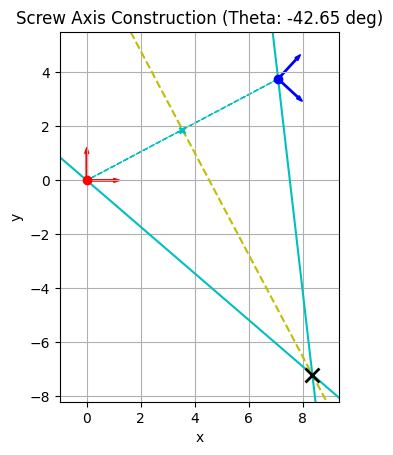

In [146]:
# Visualize
visualize_construction(
    [],
    [(l1, {'color': 'c'}), (l2, {'color': 'c'}), (bisector, {'color': 'y', 'linestyle': '--'})],    
    [(np.array([origin, x_axis]), {'color': 'r', 'width': 0.05}), (np.array([origin_prime, x_axis_prime]), {'color': 'b', 'width': 0.05}),
        (np.array([origin, y_axis]), {'color': 'r', 'width': 0.05}), (np.array([origin_prime, y_axis_prime]), {'color': 'b', 'width': 0.05}),
        (np.array([origin, origin_prime]), {'color': 'c', 'head_width': None, 'linestyle': '--'})],
    [(origin, {'marker': 'o', 'color': 'r'}), (origin_prime, {'marker': 'o', 'color': 'b'}), 
     (screw_axis[:2], {'marker': 'x', 'color': 'k', 'markersize': 10, 'markeredgewidth': 2}),
     (0.5 * (origin + origin_prime), {'marker': 'x', 'color': 'c', 'markersize': 5, 'markeredgewidth': 2})],
    title=f'Screw Axis Construction (Theta: {np.degrees(theta):.2f} deg)'
)

In [147]:
print(f"Rotation angle: {theta * 180 / np.pi:.2f} degrees")
print(f"Translation: {t}")
print(f"Calculated screw axis: {screw_axis}")

Rotation angle: -42.65 degrees
Translation: [7.09255479 3.75988661]
Calculated screw axis: [ 8.36204653 -7.20440151  1.        ]
